In [1125]:
import pandas as pd
import missingno as msno
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, robust_scale

In [1126]:
import scipy.stats

In [1127]:
df=pd.read_csv("/home/apprenant/Documents/DATA/data_assurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<AxesSubplot:>

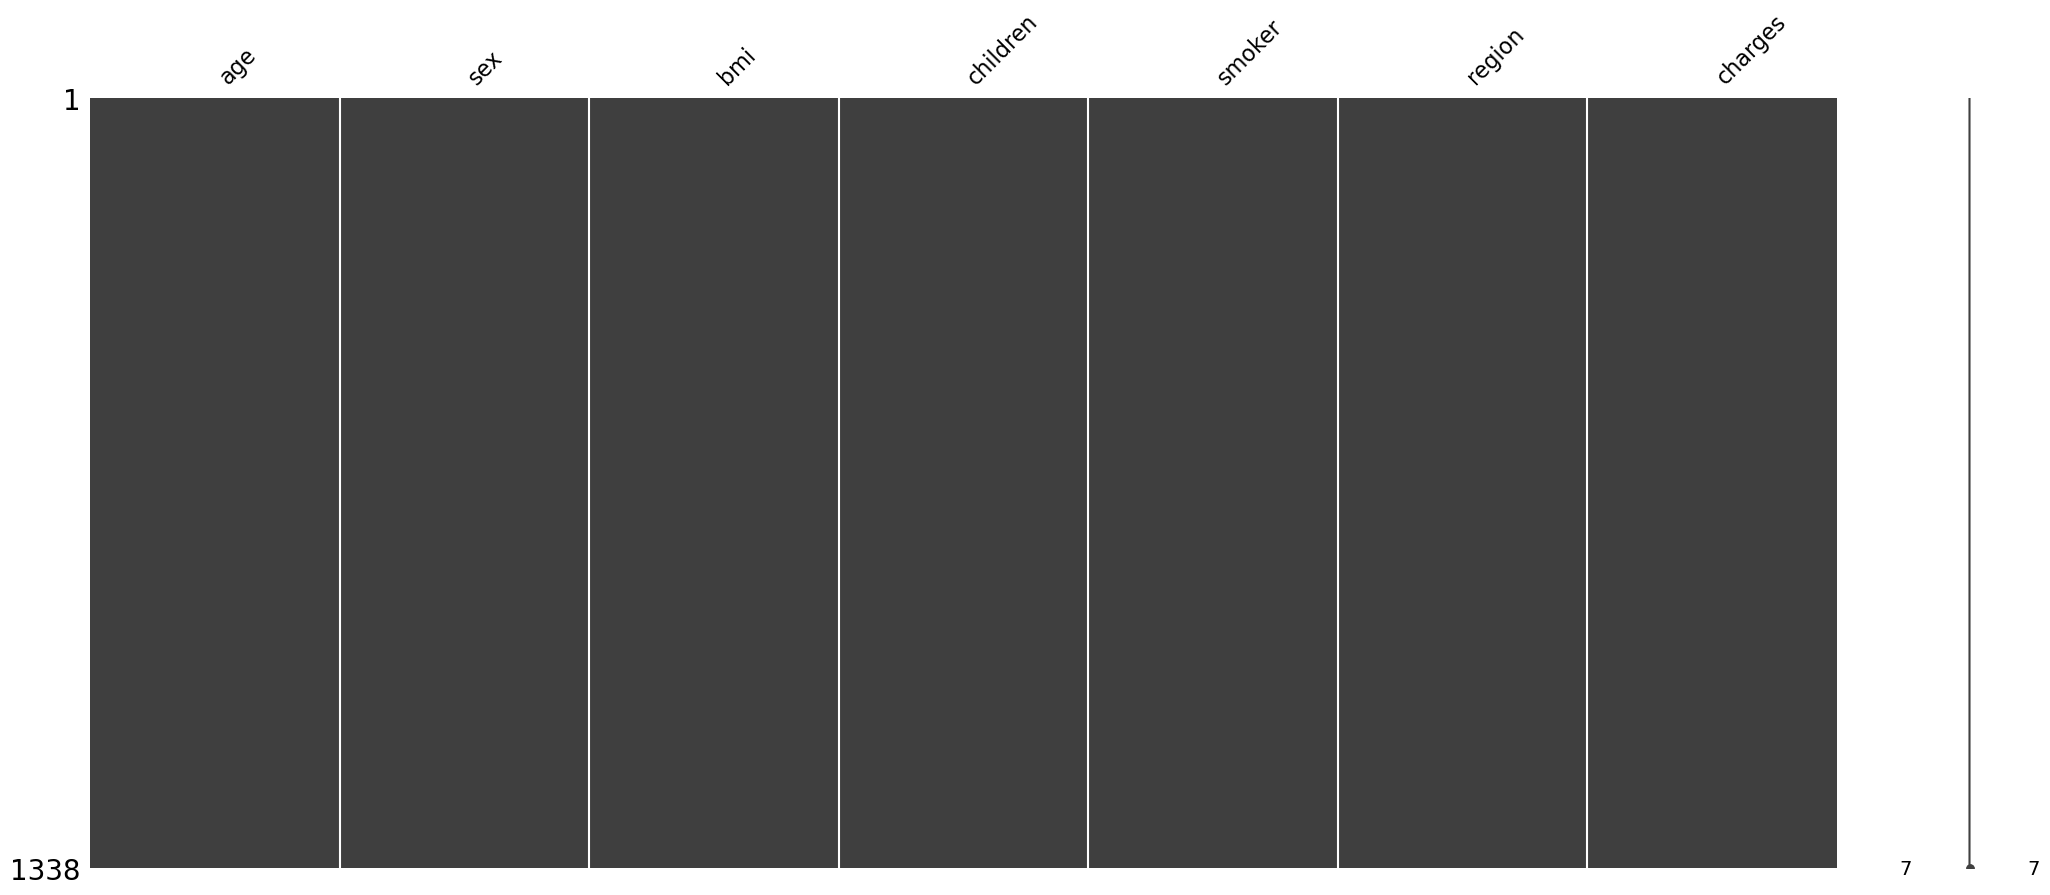

In [1128]:
msno.matrix(df)

In [1129]:
mask = df.isnull()
mask

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [1130]:
missing_values_count = mask.sum()
missing_values_count

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [1131]:
df.loc[df.duplicated(keep=False),:]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [1132]:
VALID_REGION = ['southwest', 'southeast', 'northwest', 'northeast']
mask = ~df['region'].isin(VALID_REGION)
df.loc[mask, 'region'] = np.NaN


/tmp/ipykernel_14836/2409177837.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age)


<AxesSubplot:xlabel='age', ylabel='Density'>

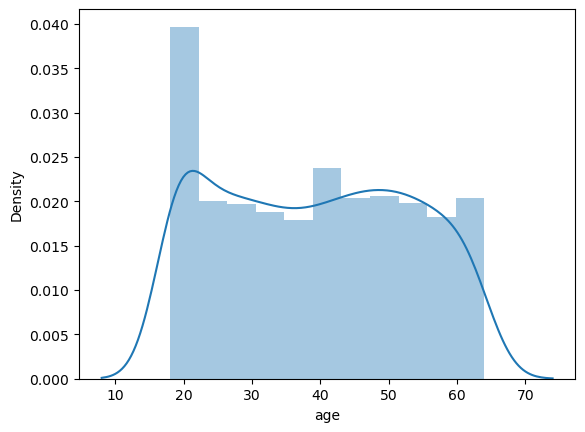

In [1133]:
sns.distplot(df.age)

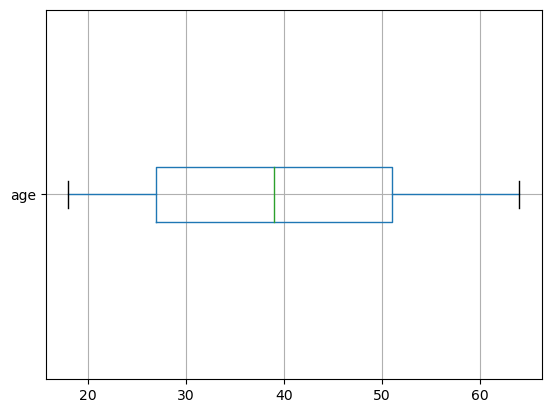

In [1134]:
df.boxplot(column="age", vert=False)
plt.show()

In [1135]:
df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [1136]:
shapiro_results = scipy.stats.shapiro(df['age'].values)
shapiro_results

ShapiroResult(statistic=0.9446989893913269, pvalue=5.687060076887153e-22)

nous pouvons voir que le pvalue<0.05 donc la distribution n'est pas normal


/tmp/ipykernel_14836/3450038586.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.charges)


<AxesSubplot:xlabel='charges', ylabel='Density'>

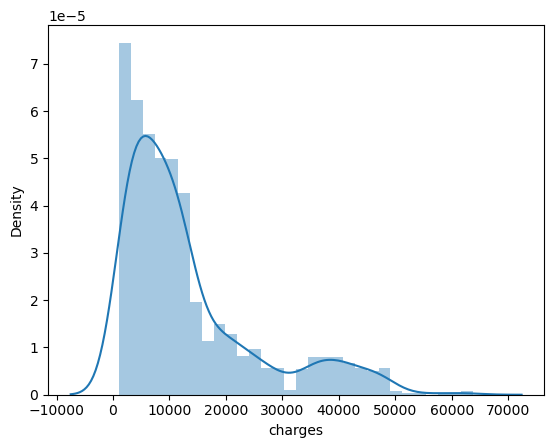

In [1137]:
sns.distplot(df.charges)

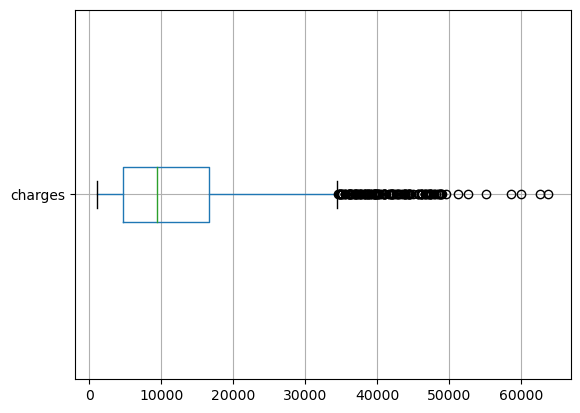

In [1138]:
df.boxplot(column="charges", vert=False)
plt.show()

In [1139]:
df.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [1140]:
shapiro_results = scipy.stats.shapiro(df['charges'].values)
shapiro_results

ShapiroResult(statistic=0.8146880865097046, pvalue=1.1505194006561963e-36)

nous pouvons voir que le pvalue<0.05 donc la distribution n'est pas normal

In [1141]:
# df['log_charges'] = np.log(df['charges'])


In [1142]:
# sns.distplot(df.log_charges)

In [1143]:
# shapiro_results = scipy.stats.shapiro(df['log_charges'].values)
# shapiro_results

/tmp/ipykernel_14836/2420122515.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.bmi)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

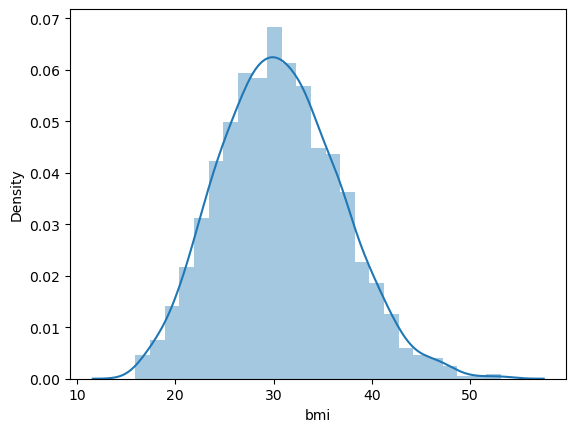

In [1144]:
sns.distplot(df.bmi)

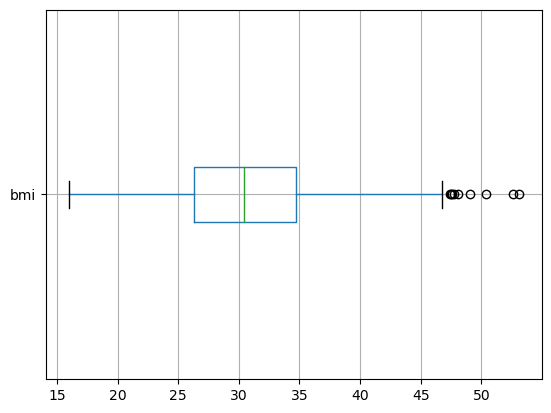

In [1145]:
df.boxplot(column="bmi", vert=False)
plt.show()

In [1146]:
df.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [1147]:
shapiro_results = scipy.stats.shapiro(df['bmi'].values)
shapiro_results

ShapiroResult(statistic=0.9938861727714539, pvalue=2.6033414542325772e-05)

nous pouvons voir que le pvalue<0.05 donc la distribution n'est pas normal

<AxesSubplot:title={'center':'Analyse univariée de la variable sexe'}, ylabel='sex'>

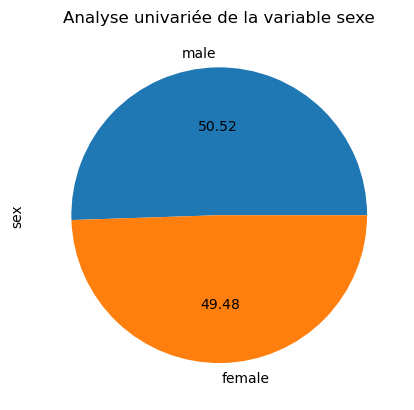

In [1148]:
freq_genre = df.sex.value_counts(normalize=True)

plt.title('Analyse univariée de la variable sexe')
freq_genre.plot(kind="pie",autopct='%.2f')

<AxesSubplot:title={'center':'Analyse univariée de la variable fumeur'}, ylabel='smoker'>

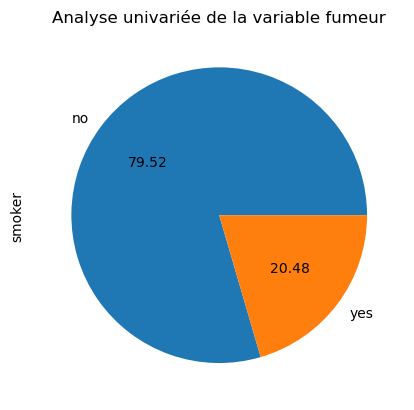

In [1149]:
freq_smoker = df.smoker.value_counts(normalize=True)



plt.title('Analyse univariée de la variable fumeur')
freq_smoker.plot(kind="pie",autopct='%.2f')

<AxesSubplot:title={'center':'Analyse univariée de la variable region'}, ylabel='region'>

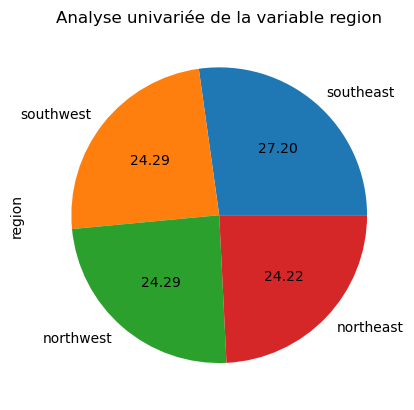

In [1150]:
freq_region = df.region.value_counts(normalize=True)



plt.title('Analyse univariée de la variable region')
freq_region.plot(kind="pie",autopct='%.2f')

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64
0    42.899851
1    24.215247
2    17.937220
3    11.733931
4     1.868460
5     1.345291
Name: children, dtype: float64


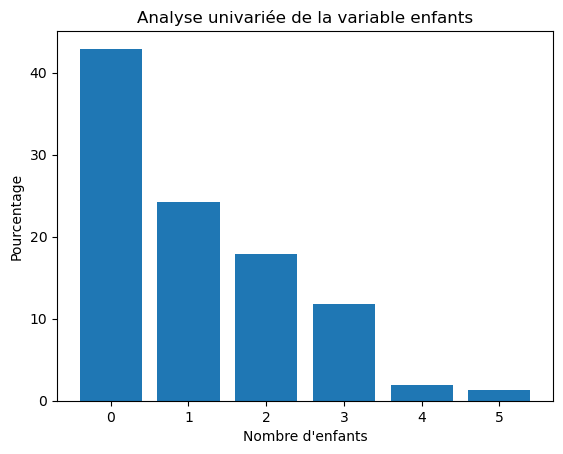

In [1151]:
# Calculer la fréquence
frequency = df['children'].value_counts()

# Calculer le pourcentage
percentage = df['children'].value_counts(normalize=True)*100

# Afficher les résultats
print(frequency)
print(percentage)

# Créer le graphique 
plt.bar(frequency.index, percentage)
plt.xlabel('Nombre d\'enfants')
plt.ylabel('Pourcentage')
plt.title('Analyse univariée de la variable enfants')
plt.show()

In [1152]:
df_continue = df[["age","bmi","charges"]]

In [1153]:

charges_corr = df_continue.corr()['charges'].sort_values() 

print(charges_corr) 

bmi        0.198341
age        0.299008
charges    1.000000
Name: charges, dtype: float64


In [1154]:
df['sex_binary'] = df['sex'].apply(lambda x: 1 if x == 'male' else 0)

In [1155]:
len(df.charges)

1338

In [1156]:
len(df.sex_binary)

1338

In [1157]:
df.sex_binary.value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex_binary, Length: 1338, dtype: int64>

In [1158]:
scipy.stats.pearsonr(df.charges, df.sex_binary)

PearsonRResult(statistic=0.057292062202025346, pvalue=0.03613272100594507)

In [1159]:
scipy.stats.pearsonr(df.charges, df.children)

PearsonRResult(statistic=0.06799822684790481, pvalue=0.012852128520141125)

In [1160]:
df['smoker_binary'] = df['smoker'].apply(lambda x: 1 if x == 'no' else 0)

In [1161]:
scipy.stats.pearsonr(df.charges, df.smoker_binary)

PearsonRResult(statistic=-0.7872514304984775, pvalue=8.271435842176839e-283)

In [1162]:
df['region_num'] = df['region'].map({'northwest':1,'northeast':2,'southeast':3,'southwest':4})


In [1163]:
scipy.stats.pearsonr(df.charges, df.region_num)

PearsonRResult(statistic=0.011740854806590255, pvalue=0.6678661746775458)


### Partie modélisation :


Dans vos variables explicatives Si les distributions ne sont pas normales, appliquer une transformation logarithmique.
Pensez à fixer le hasard grâce à seeds et des random states.
Étant donné que la variable à prédire est continue, c’est un problème de régression. Je vous conseille d’utiliser les algorithmes suivants : régression linéaire, Lasso, Ridge et ElasticNet. Sklearn dispose d’implémentation pour chacun de ses modèles. Comparer vos modèles à l'aide du R2 et du RMSE.
Si vous avez besoin d’effectuer du pré-traitement des données (standardisation, encodage des données catégorielles, etc.) Je te conseille de passer par un pipeline avec sklearn.
Analysez vos résultats avec une approche statistique grâce à ce cours : https://openclassrooms.com/fr/courses/4525326-realisez-des-modelisations-de-donnees-performantes
Étant donné que vous disposez de peu de variables vous pouvez essayer de booster vos résultats grâce à un PolynomialFeature.
Sélectionner vos hyperparamètres grâce à des GridSearchCV et RandomSearchCV.
Sélectionner votre modèle ayant les meilleurs résultats et interpréter vos résultats, par exemple : quels sont les variables les plus importantes pour votre modèle.



In [1164]:
df=pd.read_csv("/home/apprenant/Documents/DATA/data_assurance.csv")


In [1165]:
X = df.drop(['charges','region'], axis=1)
y = df['charges']

In [1166]:
# Remplacer 'bmi' par le nom de votre colonne de BMI et 'df' par le nom de votre DataFrame
bmi = X['bmi']

# Définissez les bornes de chaque catégorie de BMI
bins = [0, 18.5, 25, 30, 35, 40, float('inf')]

# Utilisez la fonction 'cut' pour transformer les valeurs de BMI en catégories
bmi_categories = pd.cut(bmi, bins, labels=['Underweight', 'Normal weight', 'Overweight', 'Obese Class I', 'Obese Class II', 'Obese Class III'])

# Ajoutez la colonne de catégories de BMI à votre DataFrame
X['bmi'] = bmi_categories

In [1167]:
X["children"]=X["children"].replace({0:"zero",1:'one',2:'two',3:'three',4:'Four',5:'five'})
X

,age,sex,bmi,children,smoker
0,19,female,Overweight,zero,yes
1,18,male,Obese Class I,one,no
2,28,male,Obese Class I,three,no
3,33,male,Normal weight,zero,no
4,32,male,Overweight,zero,no
...,...,...,...,...,...
1333,50,male,Obese Class I,three,no
1334,18,female,Obese Class I,zero,no
1335,18,female,Obese Class II,zero,no
1336,21,female,Overweight,zero,no


In [1168]:

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.8, random_state=42)
dummy = DummyRegressor()
X_train.head()
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

-0.0009192486886582252

In [1169]:
X 

,age,sex,bmi,children,smoker
0,19,female,Overweight,zero,yes
1,18,male,Obese Class I,one,no
2,28,male,Obese Class I,three,no
3,33,male,Normal weight,zero,no
4,32,male,Overweight,zero,no
...,...,...,...,...,...
1333,50,male,Obese Class I,three,no
1334,18,female,Obese Class I,zero,no
1335,18,female,Obese Class II,zero,no
1336,21,female,Overweight,zero,no


In [1170]:
#X_encoder=pd.get_dummies(X)

In [1171]:
from sklearn.pipeline import Pipeline,FeatureUnion,make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.model_selection import GridSearchCV


cols_to_encode = [ "sex","smoker","children", "bmi"]
cols_to_norm = [ "age",]
preprocessor = ColumnTransformer(
    [('Encoder',  OneHotEncoder() , cols_to_encode),('scaler',  RobustScaler() , cols_to_norm)],

)

pipeline = Pipeline([
    ('Coding', preprocessor),
    # autres étapes de votre pipeline ici
]) 
X_train = pipeline.fit_transform(X_train)
X_train

<1070x17 sparse matrix of type '<class 'numpy.float64'>'
	with 5350 stored elements in Compressed Sparse Row format>

In [1172]:
X_train.shape

(1070, 17)

In [1173]:
X_test = pipeline.transform(X_test)

### LinearRegression

In [1190]:
model = LinearRegression()
model.fit(X_train,y_train)

model.score(X_train,y_train)

0.7501388648431188

In [1210]:
y_pred = model.predict(X_train)
#y_pred.reshape(1,1070)
y_pred
residual =pd.DataFrame( (y_pred-y_train).abs())
residual
#plot residuals


,charges
560,544.007220
1285,1193.245114
1142,18493.127355
969,2013.872274
486,2786.762543
...,...
1095,3233.242127
1130,2209.993820
1294,1141.500777
860,11161.925242


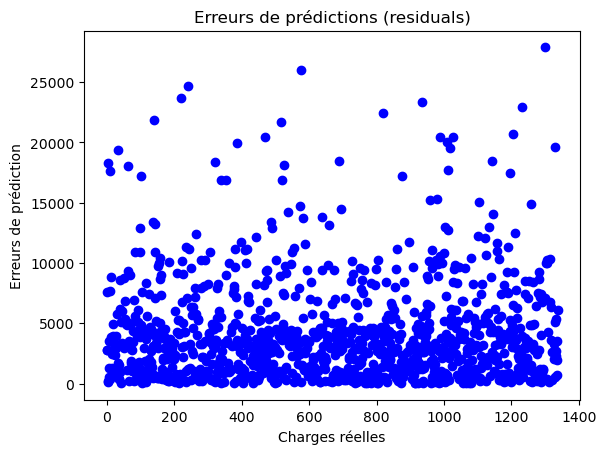

In [1216]:


plt.scatter(y_train.index, residual, color="blue")
plt.title("Erreurs de prédictions (residuals)")
plt.xlabel("Charges réelles")
plt.ylabel("Erreurs de prédiction")
plt.show()
# Filter the residuals greater than 20000 



In [1220]:
X_train_new = residual[residual['charges']< 15000].index
# # Recreate the X_train and y_train
#X_train_new=X_train.drop(residual_to_drop,axis=0)
# y_train_new=y_train.drop(residual_to_drop)
X_train_new

Int64Index([ 560, 1285,  969,  486,  170,  277, 1033,  209,  947, 1140,
            ...
             330, 1238,  466,  121, 1044, 1095, 1130, 1294,  860, 1126],
           dtype='int64', length=1035)

In [1175]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print(model.score(X_test,y_test))
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
r2
# R2 et .score s'est la meme chose

from math import sqrt

rmse = sqrt(mean_squared_error(y_test,y_pred))

print("Root Mean Squared Error (RMSE): {}".format(rmse))

MAE = mean_absolute_error(y_test, y_pred)

print('Le score de MAE est :',MAE)

0.77855279502253
Root Mean Squared Error (RMSE): 5863.3947219295205
Le score de MAE est : 4338.48412941857


In [1185]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
for i in range(2,15):   
    model = make_pipeline(PolynomialFeatures(),LinearRegression())
    params = {
        'polynomialfeatures__degree':[1,2,3],
    }

    grid = GridSearchCV(model, params, cv=i)
    grid.fit(X_train, y_train)
    print(grid.best_params_)
    print(grid.best_score_)
    print(grid.score(X_train,y_train))

{'polynomialfeatures__degree': 2}
0.7966432617351664
0.8696092721947286
{'polynomialfeatures__degree': 2}
0.8425401154370517
0.8696092721947286
{'polynomialfeatures__degree': 2}
0.8430330686045207
0.8696092721947286
{'polynomialfeatures__degree': 2}
0.8434852731830714
0.8696092721947286
{'polynomialfeatures__degree': 2}
0.8463952032096959
0.8696092721947286
{'polynomialfeatures__degree': 2}
0.8451673192008552
0.8696092721947286
{'polynomialfeatures__degree': 2}
0.8401785623010187
0.8696092721947286
{'polynomialfeatures__degree': 2}
0.842677504649107
0.8696092721947286
{'polynomialfeatures__degree': 2}
0.8445423007247468
0.8696092721947286
{'polynomialfeatures__degree': 2}
0.8429864440873907
0.8696092721947286
{'polynomialfeatures__degree': 2}
0.8447489221593015
0.8696092721947286
{'polynomialfeatures__degree': 2}
0.841179605003277
0.8696092721947286
{'polynomialfeatures__degree': 2}
0.8412276419545422
0.8696092721947286


### Lasso


In [1177]:

from sklearn.linear_model import Lasso
model = Lasso(alpha= 42, fit_intercept = True)

model.fit(X_train,y_train)
model.score(X_train,y_train)

0.7479134486682676

In [1178]:
model.score(X_test,y_test)

0.7810502630356021

In [1186]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
for i in range (2,15):
    model = make_pipeline(PolynomialFeatures(),Lasso())
    params = {
        'polynomialfeatures__degree':[1,2,3],
        'lasso__alpha':[37,38,39]
    }

    grid = GridSearchCV(model, params, cv=i)
    grid.fit(X_train, y_train)
    print(grid.best_params_)
    print(grid.best_score_)
    print(grid.score(X_train,y_train))

{'lasso__alpha': 37, 'polynomialfeatures__degree': 3}
0.8543764296025851
0.8647332575532254
{'lasso__alpha': 37, 'polynomialfeatures__degree': 2}
0.855613751440312
0.8636426413239799
{'lasso__alpha': 37, 'polynomialfeatures__degree': 3}
0.8530394004257162
0.8647332575532254
{'lasso__alpha': 37, 'polynomialfeatures__degree': 2}
0.8535734439661802
0.8636426413239799
{'lasso__alpha': 37, 'polynomialfeatures__degree': 2}
0.8548241890209636
0.8636426413239799
{'lasso__alpha': 37, 'polynomialfeatures__degree': 2}
0.8546424846429275
0.8636426413239799
{'lasso__alpha': 37, 'polynomialfeatures__degree': 2}
0.8524465025186281
0.8636426413239799
{'lasso__alpha': 37, 'polynomialfeatures__degree': 2}
0.8522098826181597
0.8636426413239799
{'lasso__alpha': 37, 'polynomialfeatures__degree': 2}
0.8528496431894638
0.8636426413239799
{'lasso__alpha': 37, 'polynomialfeatures__degree': 2}
0.8514246637966821
0.8636426413239799
{'lasso__alpha': 37, 'polynomialfeatures__degree': 2}
0.8524683162972929
0.863642

### Ridge

In [1180]:
from sklearn.linear_model import Ridge
model = Ridge(alpha= 42, fit_intercept = True)

model.fit(X_train,y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.7386803240697465
0.7682368686712414


In [1188]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
for i in range(2,15):
    model = make_pipeline(PolynomialFeatures(),Ridge())
    params = {
        'polynomialfeatures__degree':[1,2,3],
        'ridge__alpha':[7,8,9]}

    grid = GridSearchCV(model, params, cv=i)
    grid.fit(X_train, y_train)
    print(grid.best_params_)
    print(grid.best_score_)
    print(grid.score(X_train,y_train))
    print(grid)

{'polynomialfeatures__degree': 2, 'ridge__alpha': 7}
0.8444066635360608
0.8666351042262996
GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             param_grid={'polynomialfeatures__degree': [1, 2, 3],
                         'ridge__alpha': [7, 8, 9]})
{'polynomialfeatures__degree': 2, 'ridge__alpha': 7}
0.8456962002630176
0.8666351042262996
GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             param_grid={'polynomialfeatures__degree': [1, 2, 3],
                         'ridge__alpha': [7, 8, 9]})
{'polynomialfeatures__degree': 2, 'ridge__alpha': 7}
0.8460547543143009
0.8666351042262996
GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('polynomialfeatures'

### Elastic Net

In [1182]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=0.05, l1_ratio=0.9)
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.7497242089555608
0.779781825756811


In [1189]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
for i in range (2,15):
    model = make_pipeline(PolynomialFeatures(),ElasticNet())
    params = {
        'polynomialfeatures__degree':[1,2,3],
        'elasticnet__alpha':[56,57,58,59],
        'elasticnet__l1_ratio': [0,0.5,1]
    }

    grid = GridSearchCV(model, params, cv=5)
    grid.fit(X_train, y_train)
    print(grid.best_params_)
    print(grid.best_score_)
    print(grid.score(X_train,y_train))
    print(grid)

/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:593: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61835037889.178375, tolerance: 12420618.06944427
  model = cd_fast.sparse_enet_coordinate_descent(
/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:593: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59445083125.77312, tolerance: 11936317.047919445
  model = cd_fast.sparse_enet_coordinate_descent(
/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:593: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63019459894.158005, tolerance: 12659047.167726355
  model = cd_fast.sparse_enet

{'elasticnet__alpha': 56, 'elasticnet__l1_ratio': 1, 'polynomialfeatures__degree': 2}
0.852118304874527
0.860446378813354
GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('elasticnet', ElasticNet())]),
             param_grid={'elasticnet__alpha': [56, 57, 58, 59],
                         'elasticnet__l1_ratio': [0, 0.5, 1],
                         'polynomialfeatures__degree': [1, 2, 3]})


/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:593: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61835037889.178375, tolerance: 12420618.06944427
  model = cd_fast.sparse_enet_coordinate_descent(
/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:593: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59445083125.77312, tolerance: 11936317.047919445
  model = cd_fast.sparse_enet_coordinate_descent(
/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:593: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63019459894.158005, tolerance: 12659047.167726355
  model = cd_fast.sparse_enet

{'elasticnet__alpha': 56, 'elasticnet__l1_ratio': 1, 'polynomialfeatures__degree': 2}
0.852118304874527
0.860446378813354
GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('elasticnet', ElasticNet())]),
             param_grid={'elasticnet__alpha': [56, 57, 58, 59],
                         'elasticnet__l1_ratio': [0, 0.5, 1],
                         'polynomialfeatures__degree': [1, 2, 3]})


/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:593: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61835037889.178375, tolerance: 12420618.06944427
  model = cd_fast.sparse_enet_coordinate_descent(
/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:593: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59445083125.77312, tolerance: 11936317.047919445
  model = cd_fast.sparse_enet_coordinate_descent(
/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:593: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63019459894.158005, tolerance: 12659047.167726355
  model = cd_fast.sparse_enet

{'elasticnet__alpha': 56, 'elasticnet__l1_ratio': 1, 'polynomialfeatures__degree': 2}
0.852118304874527
0.860446378813354
GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('elasticnet', ElasticNet())]),
             param_grid={'elasticnet__alpha': [56, 57, 58, 59],
                         'elasticnet__l1_ratio': [0, 0.5, 1],
                         'polynomialfeatures__degree': [1, 2, 3]})


/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:593: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61835037889.178375, tolerance: 12420618.06944427
  model = cd_fast.sparse_enet_coordinate_descent(
/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:593: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59445083125.77312, tolerance: 11936317.047919445
  model = cd_fast.sparse_enet_coordinate_descent(
/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:593: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63019459894.158005, tolerance: 12659047.167726355
  model = cd_fast.sparse_enet

{'elasticnet__alpha': 56, 'elasticnet__l1_ratio': 1, 'polynomialfeatures__degree': 2}
0.852118304874527
0.860446378813354
GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('elasticnet', ElasticNet())]),
             param_grid={'elasticnet__alpha': [56, 57, 58, 59],
                         'elasticnet__l1_ratio': [0, 0.5, 1],
                         'polynomialfeatures__degree': [1, 2, 3]})


/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:593: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61835037889.178375, tolerance: 12420618.06944427
  model = cd_fast.sparse_enet_coordinate_descent(
/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:593: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59445083125.77312, tolerance: 11936317.047919445
  model = cd_fast.sparse_enet_coordinate_descent(
/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:593: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63019459894.158005, tolerance: 12659047.167726355
  model = cd_fast.sparse_enet

{'elasticnet__alpha': 56, 'elasticnet__l1_ratio': 1, 'polynomialfeatures__degree': 2}
0.852118304874527
0.860446378813354
GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('elasticnet', ElasticNet())]),
             param_grid={'elasticnet__alpha': [56, 57, 58, 59],
                         'elasticnet__l1_ratio': [0, 0.5, 1],
                         'polynomialfeatures__degree': [1, 2, 3]})


/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:593: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61835037889.178375, tolerance: 12420618.06944427
  model = cd_fast.sparse_enet_coordinate_descent(
/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:593: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59445083125.77312, tolerance: 11936317.047919445
  model = cd_fast.sparse_enet_coordinate_descent(
/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:593: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63019459894.158005, tolerance: 12659047.167726355
  model = cd_fast.sparse_enet

{'elasticnet__alpha': 56, 'elasticnet__l1_ratio': 1, 'polynomialfeatures__degree': 2}
0.852118304874527
0.860446378813354
GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('elasticnet', ElasticNet())]),
             param_grid={'elasticnet__alpha': [56, 57, 58, 59],
                         'elasticnet__l1_ratio': [0, 0.5, 1],
                         'polynomialfeatures__degree': [1, 2, 3]})


/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:593: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61835037889.178375, tolerance: 12420618.06944427
  model = cd_fast.sparse_enet_coordinate_descent(
/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:593: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59445083125.77312, tolerance: 11936317.047919445
  model = cd_fast.sparse_enet_coordinate_descent(
/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:593: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63019459894.158005, tolerance: 12659047.167726355
  model = cd_fast.sparse_enet

{'elasticnet__alpha': 56, 'elasticnet__l1_ratio': 1, 'polynomialfeatures__degree': 2}
0.852118304874527
0.860446378813354
GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('elasticnet', ElasticNet())]),
             param_grid={'elasticnet__alpha': [56, 57, 58, 59],
                         'elasticnet__l1_ratio': [0, 0.5, 1],
                         'polynomialfeatures__degree': [1, 2, 3]})


/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:593: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61835037889.178375, tolerance: 12420618.06944427
  model = cd_fast.sparse_enet_coordinate_descent(
/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:593: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59445083125.77312, tolerance: 11936317.047919445
  model = cd_fast.sparse_enet_coordinate_descent(
/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:593: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63019459894.158005, tolerance: 12659047.167726355
  model = cd_fast.sparse_enet

{'elasticnet__alpha': 56, 'elasticnet__l1_ratio': 1, 'polynomialfeatures__degree': 2}
0.852118304874527
0.860446378813354
GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('elasticnet', ElasticNet())]),
             param_grid={'elasticnet__alpha': [56, 57, 58, 59],
                         'elasticnet__l1_ratio': [0, 0.5, 1],
                         'polynomialfeatures__degree': [1, 2, 3]})


/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:593: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61835037889.178375, tolerance: 12420618.06944427
  model = cd_fast.sparse_enet_coordinate_descent(
/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:593: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59445083125.77312, tolerance: 11936317.047919445
  model = cd_fast.sparse_enet_coordinate_descent(
/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:593: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63019459894.158005, tolerance: 12659047.167726355
  model = cd_fast.sparse_enet

{'elasticnet__alpha': 56, 'elasticnet__l1_ratio': 1, 'polynomialfeatures__degree': 2}
0.852118304874527
0.860446378813354
GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('elasticnet', ElasticNet())]),
             param_grid={'elasticnet__alpha': [56, 57, 58, 59],
                         'elasticnet__l1_ratio': [0, 0.5, 1],
                         'polynomialfeatures__degree': [1, 2, 3]})


/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:593: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61835037889.178375, tolerance: 12420618.06944427
  model = cd_fast.sparse_enet_coordinate_descent(
/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:593: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59445083125.77312, tolerance: 11936317.047919445
  model = cd_fast.sparse_enet_coordinate_descent(
/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:593: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63019459894.158005, tolerance: 12659047.167726355
  model = cd_fast.sparse_enet

{'elasticnet__alpha': 56, 'elasticnet__l1_ratio': 1, 'polynomialfeatures__degree': 2}
0.852118304874527
0.860446378813354
GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('elasticnet', ElasticNet())]),
             param_grid={'elasticnet__alpha': [56, 57, 58, 59],
                         'elasticnet__l1_ratio': [0, 0.5, 1],
                         'polynomialfeatures__degree': [1, 2, 3]})


/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:593: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61835037889.178375, tolerance: 12420618.06944427
  model = cd_fast.sparse_enet_coordinate_descent(
/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:593: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59445083125.77312, tolerance: 11936317.047919445
  model = cd_fast.sparse_enet_coordinate_descent(
/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:593: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63019459894.158005, tolerance: 12659047.167726355
  model = cd_fast.sparse_enet

{'elasticnet__alpha': 56, 'elasticnet__l1_ratio': 1, 'polynomialfeatures__degree': 2}
0.852118304874527
0.860446378813354
GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('elasticnet', ElasticNet())]),
             param_grid={'elasticnet__alpha': [56, 57, 58, 59],
                         'elasticnet__l1_ratio': [0, 0.5, 1],
                         'polynomialfeatures__degree': [1, 2, 3]})


/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:593: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61835037889.178375, tolerance: 12420618.06944427
  model = cd_fast.sparse_enet_coordinate_descent(
/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:593: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59445083125.77312, tolerance: 11936317.047919445
  model = cd_fast.sparse_enet_coordinate_descent(
/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:593: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63019459894.158005, tolerance: 12659047.167726355
  model = cd_fast.sparse_enet

{'elasticnet__alpha': 56, 'elasticnet__l1_ratio': 1, 'polynomialfeatures__degree': 2}
0.852118304874527
0.860446378813354
GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('elasticnet', ElasticNet())]),
             param_grid={'elasticnet__alpha': [56, 57, 58, 59],
                         'elasticnet__l1_ratio': [0, 0.5, 1],
                         'polynomialfeatures__degree': [1, 2, 3]})


/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:593: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61835037889.178375, tolerance: 12420618.06944427
  model = cd_fast.sparse_enet_coordinate_descent(
/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:593: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59445083125.77312, tolerance: 11936317.047919445
  model = cd_fast.sparse_enet_coordinate_descent(
/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:593: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 63019459894.158005, tolerance: 12659047.167726355
  model = cd_fast.sparse_enet

{'elasticnet__alpha': 56, 'elasticnet__l1_ratio': 1, 'polynomialfeatures__degree': 2}
0.852118304874527
0.860446378813354
GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('elasticnet', ElasticNet())]),
             param_grid={'elasticnet__alpha': [56, 57, 58, 59],
                         'elasticnet__l1_ratio': [0, 0.5, 1],
                         'polynomialfeatures__degree': [1, 2, 3]})


In [1184]:
y_pred = grid.predict(X_train)
